In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 144

import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import os
import math

# Helper modules for processing the binary data files
import DataLoader
import FeatureExtractor
import Quaternions

project_path ='/Users/qiaolinchen/documents/data_incubator/capstone/rabbit_run/'

FREQ = 31  #for rabbit run data, sampling at 31/sec

In [3]:
# Define paths to load
def grab_df( subj , limb , label ): 
    # device ID, limb = LL,RL,LA, RA, label= 'walk','pre','post'
    # folder name is .../rabbit_run/post or /pre or /walk
    inDir = os.path.join( project_path , label )
    
    # file name like X1_LL_PD_ON_walk.bin
    inPaths = [ os.path.join(inDir,f) for f in os.listdir(inDir) if f.startswith(subj+'_') and limb in f ]
    assert len(inPaths)==1
    print inPaths

    df = DataLoader.loadPaths( inPaths )
    #FeatureExtractor.doctor_raw_data( df )
    # Now get measurements in the proper reference frame 
    # E.g. the vertical component of acceleration, aligned with the direction of gravity
    FeatureExtractor.doctor_raw_data( df )
    # Rolling window / FFT computer
    df = FeatureExtractor.limbfeatures( df , N= FREQ *5 )   
    # Add a simple time counter column (to supplement the DATETIME index)
    df['T'] = np.arange(len(df)) / float(FREQ)
    # Drop NaNs
    df = df.dropna()
    # Print resulting shape
    print 'Shape =', df.shape
    
    return df

In [8]:
df_sig = None
for subj in ['X1','X2','X3','X4','X5','X6','X7', 'X9','X10',  'X12','X13','X14','X15']:
    df = grab_df( subj , 'RL' , 'walk' )
    if df_sig is None:
        df_sig = df
    else:
        df_sig = df_sig.append( df )

['/Users/qiaolinchen/documents/data_incubator/capstone/rabbit_run/walk/X1_RL_PD_ON_walk.bin']
Computing features for AMAG 155
Computing features for AZ 155
Computing features for ATRAN 155
Computing features for XYANGLE 155
Shape = (75024, 66)
['/Users/qiaolinchen/documents/data_incubator/capstone/rabbit_run/walk/X2_RL_PD_ON_walk.bin']
Computing features for AMAG 155
Computing features for AZ 155
Computing features for ATRAN 155
Computing features for XYANGLE 155
Shape = (49198, 66)
['/Users/qiaolinchen/documents/data_incubator/capstone/rabbit_run/walk/X3_RL_PD_ON_walk.bin']
Computing features for AMAG 155
Computing features for AZ 155
Computing features for ATRAN 155
Computing features for XYANGLE 155
Shape = (49601, 66)
['/Users/qiaolinchen/documents/data_incubator/capstone/rabbit_run/walk/X4_RL_PD_ON_walk.bin']
Computing features for AMAG 155
Computing features for AZ 155
Computing features for ATRAN 155
Computing features for XYANGLE 155
Shape = (49453, 66)
['/Users/qiaolinchen/doc

In [9]:
df_sig['DATETIME'] = df_sig.index
df_sig.index = range(len(df_sig))
df_sig.shape

(624380, 67)

In [11]:
df_sig[['SUBJECT','LIMB', 'LABEL']].drop_duplicates()

,SUBJECT,LIMB,LABEL
0,X1PD,RL,walk
75024,X2PD,RL,walk
124222,X3PD,RL,walk
173823,X4PD,RL,walk
223276,X5PD,RL,walk
273622,X6PD,RL,walk
312156,X7PD,RL,walk
352643,X9PD,RL,walk
401438,X10PD,RL,walk
448249,X12PD,RL,walk


In [ ]:
df_sig.to_csv( 'df_sig_X1_thru_X15_RL_raw.csv' , index=False )

In [6]:
#df_sig.head()

In [25]:
# manually exam the plot and cut out the parts when subject was not walking
def cut( df , lo , hi ):
    df = df.drop( labels=range(lo,hi) , axis=0 )
    df.index = range(len(df))
    print df.shape
    return df

In [26]:
df_sig = cut( df_sig , 90000 , 125000 )
df_sig = cut( df_sig , 200 , 750 )
df_sig = cut( df_sig , 2000 , 4400 )
df_sig = cut( df_sig , 8700 , 10600 )
df_sig = cut( df_sig , 185000 , 190000 )
df_sig = cut( df_sig , 185550 , 185800 )
df_sig = cut( df_sig , 21800 , 27000 )
df_sig = cut( df_sig , 34700 , 36200 )
df_sig = cut( df_sig , 37000 , 41000 )
df_sig = cut( df_sig , 49000 , 51000 )
df_sig = cut( df_sig , 54000 , 54500 )

(238839, 71)
(238289, 71)
(235889, 71)
(233989, 71)
(228989, 71)
(228739, 71)
(223539, 71)
(222039, 71)
(218039, 71)
(216039, 71)
(215539, 71)


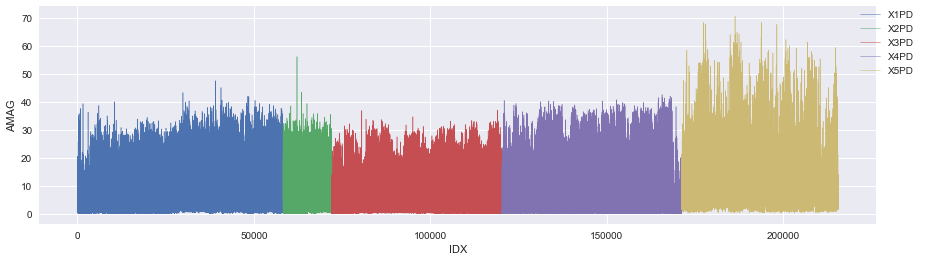

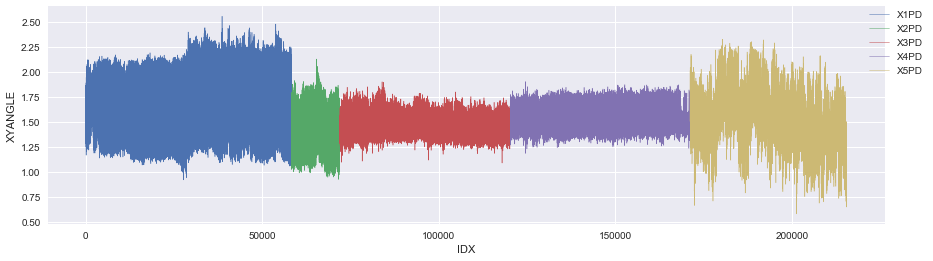

In [50]:
make_plots( df_sig )

In [34]:
list(set(df_sig['SUBJECT']))

['X1PD', 'X2PD', 'X3PD', 'X4PD', 'X5PD']

In [65]:
df_sig.to_csv( 'df_sig_X1_thru_X5_LL_clean.csv' , index=False )

In [122]:
# Make a timeseries plot
def make_plots( df , lo=-1 , hi=-1 ):
    df2= df
    df2.reset_index()
    if lo < 0: lo = 0
    if hi < 1: hi = len(df)
    for f in ['AMAG','XYANGLE']:
        fig, ax = plt.subplots( figsize=(16,4) )
        for subj in list(set(df2['SUBJECT'])):
            ax.plot( df2.loc[df2['SUBJECT']== subj,f ].index , df2.loc[df2['SUBJECT']== subj,f ] , 
                    linewidth=0.5 ,label= subj)
        plt.legend(bbox_to_anchor=(1.05, 1), loc= 0, borderaxespad=0.)    
        ax.set_xlabel( 'IDX' )
        ax.set_ylabel( f )
    #del df2
    

In [ ]:
df_bkg = None
for subj in ['X1','X2','X3','X4','X5']:
    for label in [ 'pre' , 'post' ]:
        if label=='pre' and subj=='X5': continue
        df = grab_df( subj , 'LL' , label )
        if df_bkg is None:
            df_bkg = df
        else:
            df_bkg = df_bkg.append( df )

In [52]:
df_bkg['DATETIME'] = df_bkg.index
df_bkg.index = range(len(df_bkg))
df_bkg.shape

(223407, 71)

In [62]:
df_bkg = cut( df_bkg , 77000 , 115000 )
df_bkg = cut( df_bkg , 52000 , 54000 )
df_bkg = cut( df_bkg , 53000 , 59000 )
df_bkg = cut( df_bkg , 127500 , 139000 )
df_bkg = cut( df_bkg , 163000 , 164000 )
df_bkg = cut( df_bkg , 110000 , 125000 )
df_bkg = cut( df_bkg , 135000 , 140000 )
df_bkg = cut( df_bkg , 42000 , 50000 )

(185407, 71)
(183407, 71)
(177407, 71)
(165907, 71)
(164907, 71)
(149907, 71)
(144907, 71)
(136907, 71)


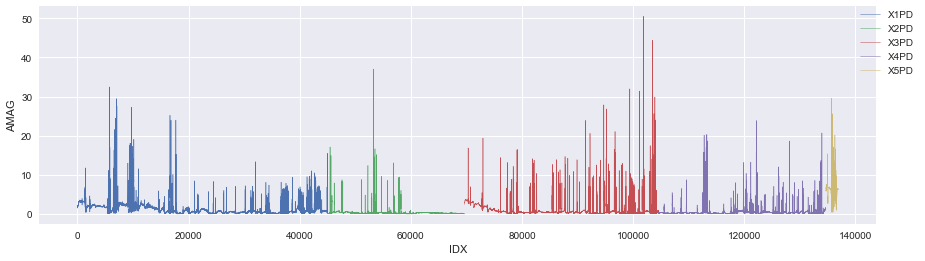

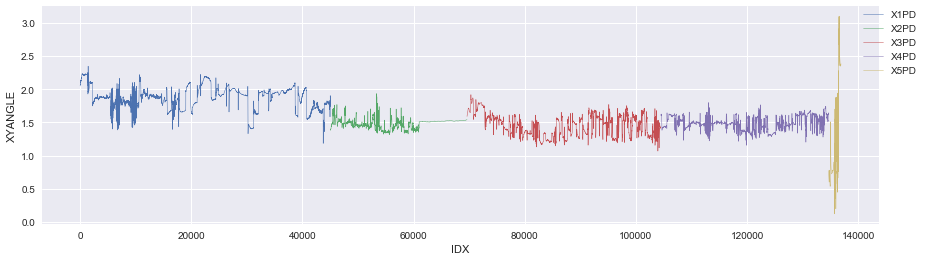

In [63]:
make_plots( df_bkg )

In [64]:
df_bkg.to_csv( 'df_bkg_X1_thru_X5_LL_clean.csv' , index=False )

## Control Subjects Data

In [ ]:
df_new = None
for subj in ['X16','X17','X18','X19','X20']:
    for label in [ 'walk' ]:
        df = grab_df( subj , 'RL' , label )
        if df_new is None:
            df_new = df
        else:
            df_new = df_new.append( df )

['/Users/qiaolinchen/documents/data_incubator/capstone/rabbit_run/walk/X16_RL_CT_NA_walk.bin']
Computing features for AMAG 155
Computing features for AZ 155
Computing features for ATRAN 155
Computing features for XYANGLE 155
Shape = (45881, 66)
['/Users/qiaolinchen/documents/data_incubator/capstone/rabbit_run/walk/X17_RL_CT_NA_walk.bin']
Computing features for AMAG 155
Computing features for AZ 155
Computing features for ATRAN 155
Computing features for XYANGLE 155
Shape = (42111, 66)
['/Users/qiaolinchen/documents/data_incubator/capstone/rabbit_run/walk/X18_RL_CT_NA_walk.bin']
Computing features for AMAG 155
Computing features for AZ 155
Computing features for ATRAN 155
Computing features for XYANGLE 155
Shape = (50810, 66)
['/Users/qiaolinchen/documents/data_incubator/capstone/rabbit_run/walk/X19_RL_CT_NA_walk.bin']
Computing features for AMAG 155
Computing features for AZ 155
Computing features for ATRAN 155
Computing features for XYANGLE 155
Shape = (46941, 66)
['/Users/qiaolinchen

In [ ]:
df_new['DATETIME'] = df_new.index
df_new.index = range(len(df_new))
df_new.shape

In [ ]:
df_new[['SUBJECT','LIMB', 'LABEL']].drop_duplicates()

In [ ]:
df_new.to_csv( 'df_sig_X16-X20_RL_raw.csv' , index=False )

In [21]:
df_new1= df_new.copy()
df_new1.shape

(261352, 71)

(260152, 71)
(257952, 71)
(253752, 71)
(251752, 71)
(248552, 71)
(248052, 71)
(246302, 71)
(243102, 71)


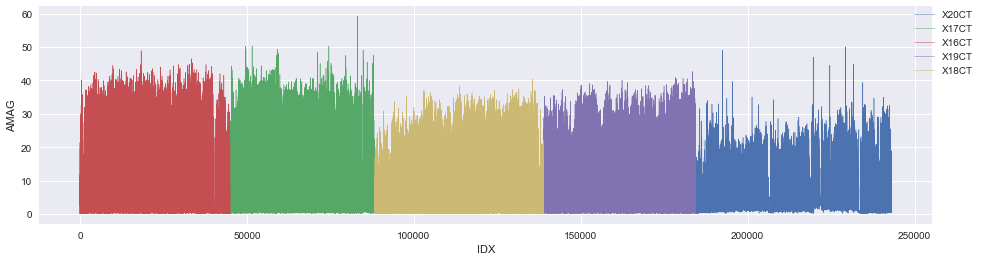

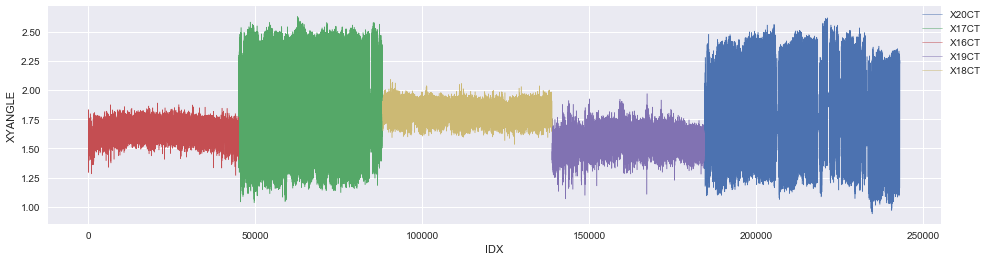

In [178]:
df_new = df_new1.copy()

df_new = cut( df_new , 84800 , 86000)
df_new = cut( df_new , 196100 , 198300 )
df_new = cut( df_new , 209300 , 213500 )
df_new = cut( df_new , 221550 , 223550 )
df_new = cut( df_new , 224600 , 227800 )
df_new = cut( df_new , 227800 , 228300 )
df_new = cut( df_new , 236050 , 237800 )
df_new = cut( df_new , 186800 , 190000 )



make_plots( df_new )

In [179]:
df_new.to_csv( 'df_sig_X16_thru_X20_LL_clean.csv' , index=False )

In [ ]:
df_new = None
for subj in ['X16','X17','X18','X19','X20']:
    for label in [ 'pre' , 'post' ]:
        df = grab_df( subj , 'LL' , label )
        if df_new is None:
            df_new = df
        else:
            df_new = df_new.append( df )

['/Users/qiaolinchen/documents/data_incubator/capstone/rabbit_run/pre/X16_LL_CT_NA_pre.bin']
Computing features for AMAG 155
Computing features for AZ 155
Computing features for ATRAN 155
Computing features for XYANGLE 155
Shape = (26168, 66)
['/Users/qiaolinchen/documents/data_incubator/capstone/rabbit_run/post/X16_LL_CT_NA_post.bin']
Computing features for AMAG 155
Computing features for AZ 155
Computing features for ATRAN 155
Computing features for XYANGLE 155
Shape = (3473, 66)
['/Users/qiaolinchen/documents/data_incubator/capstone/rabbit_run/pre/X17_LL_CT_NA_pre.bin']
Computing features for AMAG 155
Computing features for AZ 155
Computing features for ATRAN 155
Computing features for XYANGLE 155
Shape = (43246, 66)
['/Users/qiaolinchen/documents/data_incubator/capstone/rabbit_run/post/X17_LL_CT_NA_post.bin']
Computing features for AMAG 155
Computing features for AZ 155
Computing features for ATRAN 155
Computing features for XYANGLE 155
Shape = (1613, 66)
['/Users/qiaolinchen/docum

In [181]:
df_new['DATETIME'] = df_new.index
df_new.index = range(len(df_new))
df_new.shape

(238450, 71)

In [183]:
df_new = cut( df_new , 21000 , 24000 )
df_new = cut( df_new , 128750 , 130000 )
df_new = cut( df_new , 231000 , 233000 )
df_new = cut( df_new , 228000 , 230000 )
df_new = cut( df_new , 224000 , 225000 )

(235450, 71)
(234200, 71)
(232200, 71)
(230200, 71)
(229200, 71)


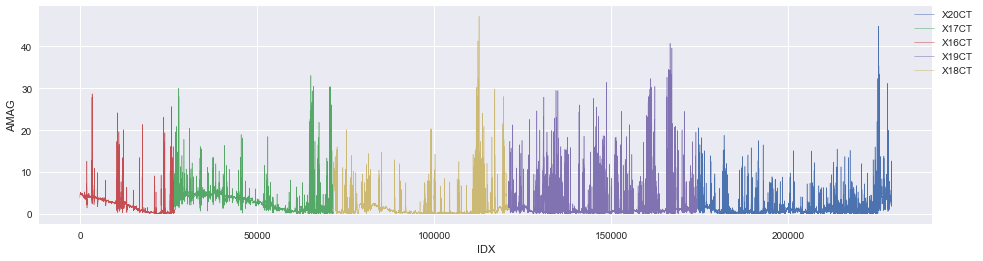

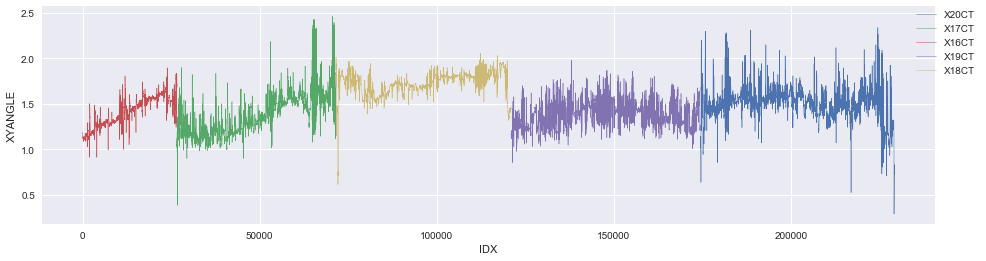

In [184]:
make_plots( df_new )

In [185]:
df_new.to_csv( 'df_bkg_X16_thru_X20_LL_clean.csv' , index=False )

In [188]:
df_new.head(2)

,Q0,Q1,Q2,Q3,AX,AY,AZ,SUBJECT,LIMB,LABEL,...,MED_XYANGLE_155,RANGE_XYANGLE_155,SKEW_XYANGLE_155,FFTP_W0_XYANGLE_155,FFTP_W1_XYANGLE_155,FFTP_W2_XYANGLE_155,FFTP_W3_XYANGLE_155,FFTP_W4_XYANGLE_155,T,DATETIME
0,0.738849,-0.170945,-0.534747,-0.372728,2.904555,-2.715343,-0.171664,X16CT,LL,pre,...,1.192166,0.201159,0.322147,4.504259,0.668179,0.309353,0.154137,0.091541,2.483871,2017-04-14 16:49:46.483870
1,0.739321,-0.169758,-0.534360,-0.372888,2.909133,-2.787060,-0.165560,X16CT,LL,pre,...,1.190406,0.201159,0.347638,4.498273,0.651013,0.313236,0.154398,0.091709,2.516129,2017-04-14 16:49:46.516128
